<hr style="height:10px">

<div class='container2'>
	<div style='padding: 0 7em 2em 12em;'>
	<h1>Laboratório de Inovação e Automação 1 (LIA 1)</h1>
	<div style="font-size:12pt;float:left;"> 2025/1 | 46M34 | Sala 200 CAE</div><br><br>
    <div style="font-size:12pt;float:left;"><b>Projetos de Inteligência Artificial - Análise Exploratória de Dados </b></div>
	</div>
</div>


 <hr style="height:5px">

    
<h2>Aula 6 - Introdução à Ciência de Dados - <a href="https://www.kaggle.com/datasets/nikdavis/steam-store-games/data">Steam Store Games </a> </h2>

Notebook desenvolvido por: <a href=" http://lattes.cnpq.br/3364667237527265">Alexandre Moura Caldeira</a>

 <hr style="height:2px">

# Importando os dados

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_dataset = pd.read_csv ( 'datasets/steam.csv', sep=',', index_col=None)


# Exibindo o dataset


In [75]:
display(df_dataset)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


In [76]:
# remover as colunas appid, english, publisher, plataforms, required_age, categories, steamspy_tags, achievements.
df_dataset = df_dataset.drop(columns=['appid','english','publisher','platforms','required_age','categories','steamspy_tags','achievements'])
display(df_dataset.head(5))

,name,release_date,developer,genres,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,Counter-Strike,2000-11-01,Valve,Action,124534,3339,17612,317,10000000-20000000,7.19
1,Team Fortress Classic,1999-04-01,Valve,Action,3318,633,277,62,5000000-10000000,3.99
2,Day of Defeat,2003-05-01,Valve,Action,3416,398,187,34,5000000-10000000,3.99
3,Deathmatch Classic,2001-06-01,Valve,Action,1273,267,258,184,5000000-10000000,3.99
4,Half-Life: Opposing Force,1999-11-01,Gearbox Software,Action,5250,288,624,415,5000000-10000000,3.99


# Verificando se tem célula vazia

In [77]:
idxRowNan = pd.isnull(df_dataset).any(axis=1).to_numpy().nonzero()
display(df_dataset.iloc[idxRowNan])

,name,release_date,developer,genres,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
23071,The Battle Of Ages,2018-09-07,NaN,Action;Indie;Massively Multiplayer;RPG;Early A...,2,1,0,0,0-20000,3.99


## Excluindo linhas que possuem celulas vazia

In [78]:
df_dataset = df_dataset.dropna()

---

Verificando dados redundantes na coluna nome

In [79]:
duplicates = df_dataset[df_dataset.duplicated(subset=['name'], keep=False)]
print("\nLinhas Duplicadas:")
display(duplicates)


Linhas Duplicadas:


,name,release_date,developer,genres,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
388,Chaos Theory,2008-05-22,blurredVision,Casual;Indie,10,1,0,0,0-20000,1.99
735,RUSH,2010-12-03,Two Tribes,Casual;Indie;Strategy,1069,117,53,56,200000-500000,3.99
968,Alter Ego,2010-08-03,bitComposer Games,Adventure,139,59,12,12,20000-50000,7.19
1975,Dark Matter,2013-10-17,InterWave Studios,Action;Indie,78,107,0,0,0-20000,6.99
2729,New York Bus Simulator,2014-08-06,TML-Studios,Simulation,29,35,0,0,0-20000,8.99
...,...,...,...,...,...,...,...,...,...,...
25792,Zombie Apocalypse,2019-03-09,Kapitan,Action;Adventure;Casual;Indie;Early Access,21,7,0,0,0-20000,1.69
26029,Cortex,2018-12-28,Milan Toth,Action,5,0,0,0,0-20000,0.00
26276,Hide and Seek,2019-02-01,Funny Games,Action;Massively Multiplayer;RPG;Early Access,55,38,0,0,0-20000,2.09
26418,Experience,2019-02-01,Liu baixue,RPG,2,2,0,0,0-20000,13.49


In [80]:
df_dataset = df_dataset.drop_duplicates(subset=['name'], keep=False)
display(df_dataset)

,name,release_date,developer,genres,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,Counter-Strike,2000-11-01,Valve,Action,124534,3339,17612,317,10000000-20000000,7.19
1,Team Fortress Classic,1999-04-01,Valve,Action,3318,633,277,62,5000000-10000000,3.99
2,Day of Defeat,2003-05-01,Valve,Action,3416,398,187,34,5000000-10000000,3.99
3,Deathmatch Classic,2001-06-01,Valve,Action,1273,267,258,184,5000000-10000000,3.99
4,Half-Life: Opposing Force,1999-11-01,Gearbox Software,Action,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...
27070,Room of Pandora,2019-04-24,SHEN JIAWEI,Adventure;Casual;Indie,3,0,0,0,0-20000,2.09
27071,Cyber Gun,2019-04-23,Semyon Maximov,Action;Adventure;Indie,8,1,0,0,0-20000,1.69
27072,Super Star Blast,2019-04-24,EntwicklerX,Action;Casual;Indie,0,1,0,0,0-20000,3.99
27073,New Yankee 7: Deer Hunters,2019-04-17,Yustas Game Studio,Adventure;Casual;Indie,2,0,0,0,0-20000,5.19


---
# Análise de Dados


In [81]:
df_detalhes = df_dataset.describe()

display(df_detalhes)

,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.699100e+04,26991.000000,26991.00000,26991.000000,26991.000000
mean,1.003492e+03,211.601978,150.19714,146.432959,6.085685
std,1.901818e+04,4291.588067,1829.85854,2357.524655,7.883457
min,0.000000e+00,0.000000,0.00000,0.000000,0.000000
25%,6.000000e+00,2.000000,0.00000,0.000000,1.690000
50%,2.500000e+01,9.000000,0.00000,0.000000,3.990000
75%,1.260000e+02,42.000000,0.00000,0.000000,7.190000
max,2.644404e+06,487076.000000,190625.00000,190625.000000,421.990000


---
# Verificando o blox plot

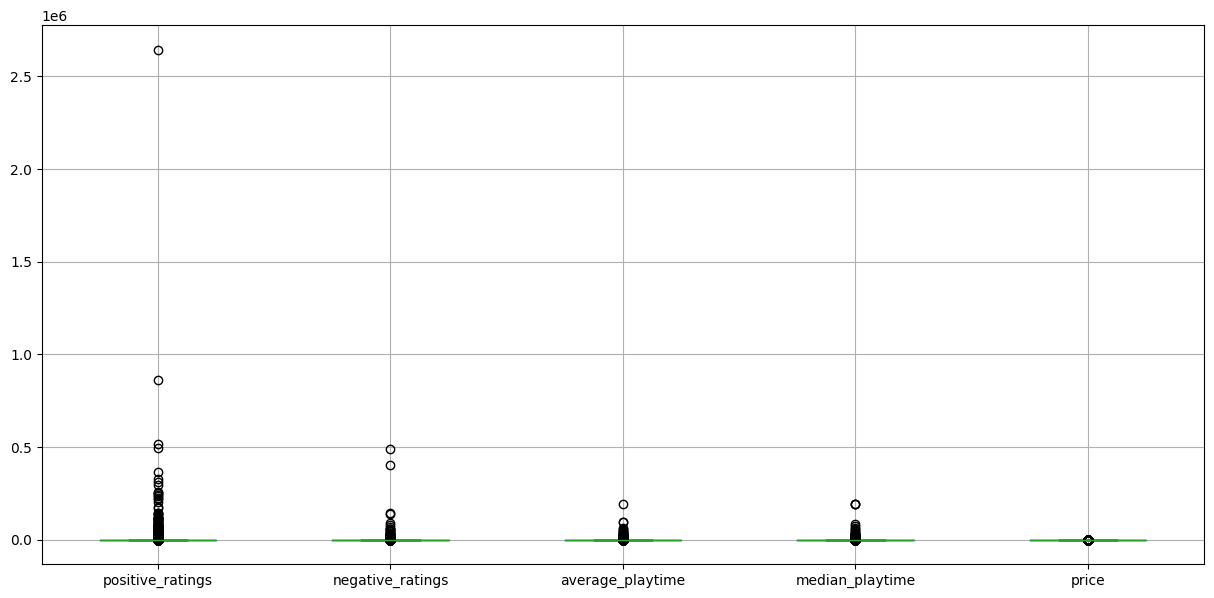

In [82]:
df_dataset.boxplot(figsize=(15,7))
plt.show()

# Jogo com mais avaliação positiva

In [83]:
positive_game= df_dataset['positive_ratings'].idxmax()
print(df_dataset.loc[positive_game])

name                Counter-Strike: Global Offensive
release_date                              2012-08-21
developer            Valve;Hidden Path Entertainment
genres                           Action;Free to Play
positive_ratings                             2644404
negative_ratings                              402313
average_playtime                               22494
median_playtime                                 6502
owners                            50000000-100000000
price                                            0.0
Name: 25, dtype: object


# Jogo com mais avaliação negativa

In [84]:
negative_game = df_dataset['negative_ratings'].idxmax()
print(df_dataset.loc[negative_game])

name                         PLAYERUNKNOWN'S BATTLEGROUNDS
release_date                                    2017-12-21
developer                                 PUBG Corporation
genres              Action;Adventure;Massively Multiplayer
positive_ratings                                    496184
negative_ratings                                    487076
average_playtime                                     22938
median_playtime                                      12434
owners                                  50000000-100000000
price                                                26.99
Name: 12836, dtype: object


# Mais caro

In [85]:
expensive_game = df_dataset['price'].idxmax()
print(df_dataset.loc[expensive_game])

name                     ADR-Labelling Game
release_date                     2018-04-12
developer           Suomen Kuljetusturva Oy
genres                           Simulation
positive_ratings                          1
negative_ratings                          0
average_playtime                          0
median_playtime                           0
owners                              0-20000
price                                421.99
Name: 21105, dtype: object


# Removendo separadamente os outliers (primeiro removemos o das colunas poitive_ratings, negative_reatings e depois da average_playtime, median-playtime, price)

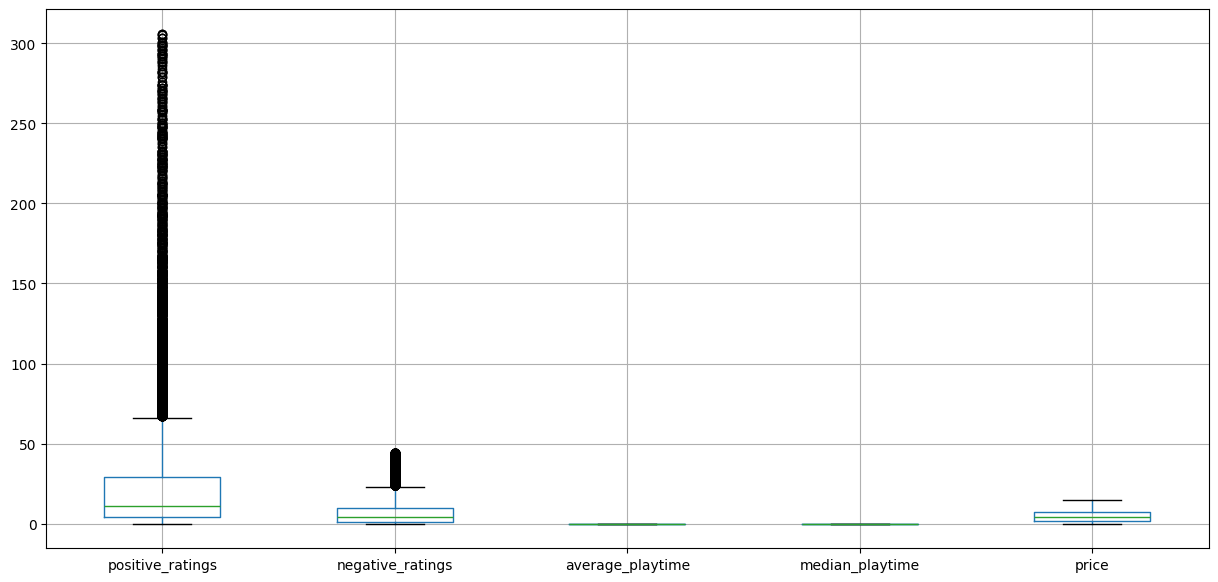

In [86]:
def removeOutliers(df_dataset, colunas):
    """
    Remove os outliers da base de dados para colunas específicas.
    """
    for atributo in colunas:
        if atributo in df_dataset.columns:
            # Obtém o terceiro e o primeiro quartil.
            q75, q25 = np.percentile(df_dataset[atributo].values, [75, 25])

            # Calcula o IQR
            IQR = q75 - q25

            # Remove os outliers com base no valor do IQR
            df_dataset = df_dataset[(df_dataset[atributo] <= (q75 + 1.5 * IQR)) & (df_dataset[atributo] >= (q25 - 1.5 * IQR))]

    return df_dataset

# Remove os outliers separadamente
df_dataset = removeOutliers(df_dataset, ["positive_ratings", "negative_ratings"])
df_dataset = removeOutliers(df_dataset, ["average_playtime", "median-playtime", "price"])

# Apresenta as principais estatísticas sobre a base de dados
df_dataset.boxplot(figsize=(15, 7))
plt.show()